In [ ]:
import numpy as np
import numpy.matlib 
import math
import matplotlib.pyplot as plt
import csv
from matplotlib import cm

Consider the Lotka-Volterra equations 

$$\begin{cases} \dfrac{\mathrm{d} x}{\mathrm{d} t}=x(\alpha -\beta y) \\
                \dfrac{\mathrm{d} y}{\mathrm{d} t}=y(\delta x -\gamma)\end{cases}$$

for $\alpha=0.1$, $\beta=0.02$, $\gamma=0.4$, $\delta=0.02$. 


1. Use Euler's method to simulate the system from the initial condition $x(0)=10$, $y(0)=10$ with $\mathrm{d}t=0.01$. 
   Show that the system is unstable by considering a high number of steps in your simulation. To do so, plot the solution in      $\big(x(t), y(t)\big)$ in the phase potrait.


2. Use Runge-Kutta 2 and the Midpoint method to simulate the system. Show that methods lead to stable trajectories in comparison to Euler. As before, plot the solutions $\big(x(t), y(t)\big)$ for the different methods. 



In the following cell, I define a class to simulate different numerical methods for a 2-dimensional system. The class has the same structure as the one in the previous lab, but has been generalised to deal with higher dimensions.
The class receives as input the function f, which for the case considered is two dimensional. The function $f$ needs to receive as input a vector of values (the values of $x(t)$ and $y(t)$) and the value of $t$ (even if the system is autonomous and the function has no explicit dependence on t). For instance, see how I defined the function in the cell after the next one.

* The method Initialise set the initial condition (the starting values of x and t) from which we want to simulate.


- The method Euler performs Euler's method. 

- The method MidPoint performs the Midpoint method.

- The method RungeKutta2 performs RungeKutta 2.

All these last three methods receive as input the value of $\mathrm{d}t$ adopted and the number of iterations considered.
The output of all these methods are: X. the dynamic of the system across time; T, the values of time used in the simulation.


In [ ]:
class Numerical_methods:
    
    def __init__(self,f):  
        
        self.f=f
        self.x=[]
        self.t=[]
        self.N_dim=[]
        
        
    def Initialise(self,x_start,t_start):
        
        
        self.N_dim=np.shape(x_start)[0]
        self.x=x_start
        self.t=t_start
        
        
    def Euler(self,dt,N_iter):
        
        X=np.zeros([self.N_dim,N_iter])
        T=np.zeros([N_iter])
        
        X[:,0]=np.copy(self.x)               ## The main differenece in comparison to the class in the previous lab is in the definition 
                                             ## and utilisation of variables x and X, which are multidimensional.  
        
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
        
            self.x=self.x+dt*f(self.x,self.t)
            X[:,n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T
    
    def MidPoint(self,dt,N_iter):
        
        X=np.zeros([self.N_dim,N_iter])
        T=np.zeros([N_iter])
        
        X[:,0]=np.copy(self.x)
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
            
            x_mp=self.x+dt/2*f(self.x,self.t)
            self.x=self.x+dt*f(x_mp,self.t+dt/2)
            
            
            X[:,n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T
    
    def RungeKutta2(self,dt,N_iter):
        
        X=np.zeros([self.N_dim,N_iter])
        T=np.zeros([N_iter])
        
        X[:,0]=np.copy(self.x)
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
            
            k1=f(self.x,self.t)
            k2=f(self.x+dt*k1,self.t+dt)    
                        
            self.x=self.x+dt*(k1+k2)/2
            
            X[:,n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T

                


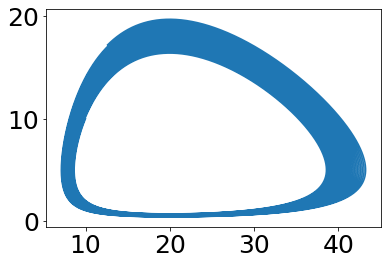

In [ ]:
def f(x,t):     ## Definition of the function for Lotka-Volterra. t needs to be an input even if the function does not use it, as in this case.
                ## This formulation permits us to be general and to apply the same code to non autonomous systems.
    
    alpha=0.1
    beta=0.02
    gamma=0.4
    delta=0.02
    
    z=np.zeros([np.shape(x)[0]])
    
    z[0]=x[0]*(alpha-beta*x[1])
    z[1]=x[1]*(delta*x[0]-gamma)
    
    return z

## As in the previous lab, use the class and the function above to complete the exercise...
NM=Numerical_methods(f) 
NM.Initialise([10,10],0.01)     
dt = 0.01
N_iter = 100000

X, T = NM.Euler(dt, N_iter)

plt.plot(X[0,:],X[1,:])




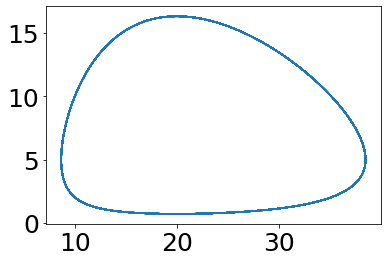

In [ ]:
NM=Numerical_methods(f) 
NM.Initialise([10,10],0.01)     
dt = 0.01
N_iter = 100000

X, T = NM.MidPoint(dt, N_iter)

plt.plot(X[0,:],X[1,:])

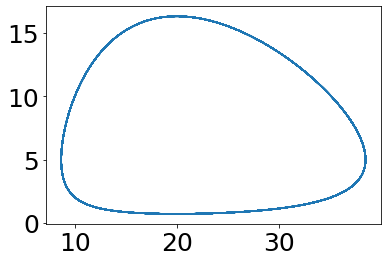

In [ ]:
NM=Numerical_methods(f) 
NM.Initialise([10,10],0.01)     
dt = 0.01
N_iter = 100000

X, T = NM.RungeKutta2(dt, N_iter)

plt.plot(X[0,:],X[1,:])

Consider the linear differential equations 


$$\begin{cases} \dfrac{\mathrm{d} x}{\mathrm{d} t}=-x +2y\\
                \dfrac{\mathrm{d} y}{\mathrm{d} t}=-3y\end{cases}$$


1. Find the eigenvalues and eigenvectors (numerically or analytically) of the Jacobian. To do this numerically, you can use np.linalg.eig(J), where J is the jacobian.

2. Draw the solution (not precisely)

3. Find three solutions from different initial conditions of your choice through Euler's method and plot them in a phase diagram $(x(t),y(t))$




(array([-1., -3.]), array([[ 1.        , -0.70710678],
       [ 0.        ,  0.70710678]]))


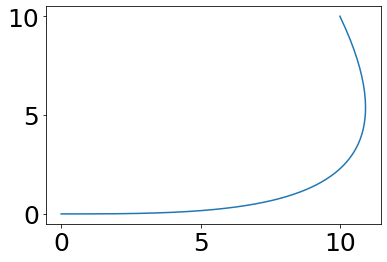

In [ ]:
## Use the class above once again to simulate the system from different initial conditions and to plot the results
def f(x,t):     ## Definition of the function for Lotka-Volterra. t needs to be an input even if the function does not use it, as in this case.
                ## This formulation permits us to be general and to apply the same code to non autonomous systems.
   
    z=np.zeros([np.shape(x)[0]])
    z[0] = -x[0] + 2*x[1]
    z[1] = -3*x[1]
    
    return z
NM=Numerical_methods(f) 
NM.Initialise([10,10],0.01)     
dt = 0.01
N_iter = 100000

X, T = NM.Euler(dt, N_iter)

plt.plot(X[0,:],X[1,:])

J = [[-1,2],
     [0,-3]]

print(np.linalg.eig(J))    

(array([-1., -3.]), array([[ 1.        , -0.70710678],
       [ 0.        ,  0.70710678]]))


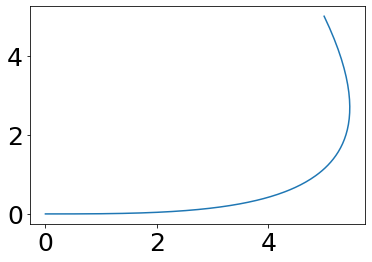

In [ ]:
NM=Numerical_methods(f) 
NM.Initialise([5,5],0.05)     
dt = 0.01
N_iter = 100000

X, T = NM.Euler(dt, N_iter)

plt.plot(X[0,:],X[1,:])

J = [[-1,2],
     [0,-3]]

print(np.linalg.eig(J))    

(array([-1., -3.]), array([[ 1.        , -0.70710678],
       [ 0.        ,  0.70710678]]))


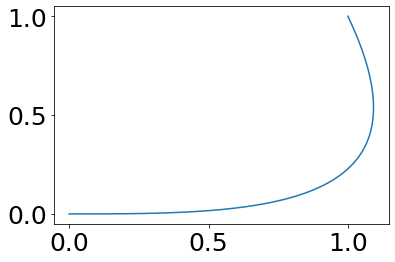

In [ ]:
NM=Numerical_methods(f) 
NM.Initialise([1,1],0.1)     
dt = 0.01
N_iter = 100000

X, T = NM.Euler(dt, N_iter)

plt.plot(X[0,:],X[1,:])

J = [[-1,2],
     [0,-3]]

print(np.linalg.eig(J))    

The following cells show how to do a phase plot with the directions at which the system tends to. 
Please, read it and try to understand the passages.
The system considered is the Lotka-Volterra model above.



In [ ]:

def f(x,t):     ## Definition of the function for Lotka-Volterra. t needs to be an input even if the function does not use it, as in this case.
                ## This formulation permits us to be general and to apply the same code to non autonomous systems.
    
    alpha=0.1
    beta=0.02
    gamma=0.4
    delta=0.02
    
    z=np.zeros([np.shape(x)[0]])
    
    z[0]=x[0]*(alpha-beta*x[1])
    z[1]=x[1]*(delta*x[0]-gamma)
    
    return z


NM=Numerical_methods(f)          ## Object definition

##Initial conditions

dt=0.001                         ## Value of dt
N_iter=int(100/dt)               ## Number of iteration. 

N_tr=10                          # Number of solutions 

## I save different solutions for different initial conditions in the following variable
X_euler=np.zeros([N_tr,2,N_iter])


for i in range(N_tr):
    
    x_start=[10+5*i,10]          # Different initial conditions for different solutions
    t_start=0.


    NM.Initialise(x_start,t_start)     ## Setting the initial conditions in the object

        
    X_euler[i,:,:],ts=NM.RungeKutta2(dt,N_iter)     ## Perform Runge-Kutta 2 and save it


Text(0, 0.5, 'Predator number')

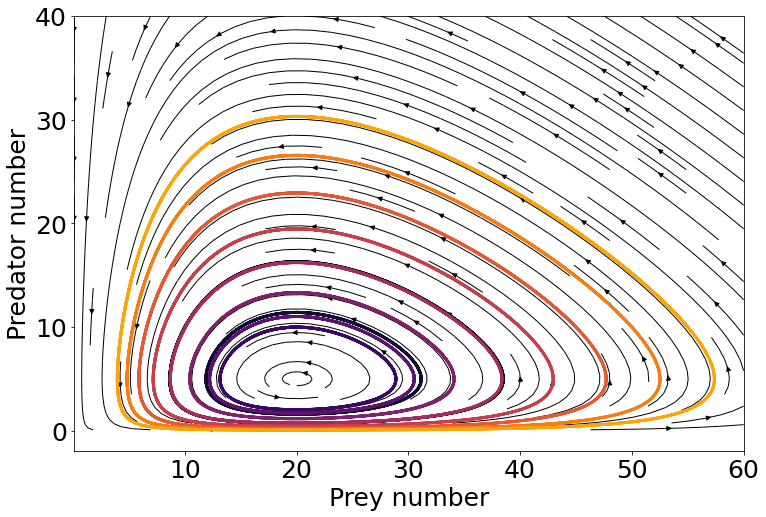

In [ ]:
N_x=20

x1=np.linspace(0.1,60,N_x)           ## x values considered
x2=np.linspace(0.1,40,N_x)           ## y values considered

X1,X2=np.meshgrid(x1,x2)             ## np.meshgrid creates a grid with the data across the x and y dimension

Z1=np.zeros([N_x,N_x])               ## This contains the direction across x for each data point in the grid
Z2=np.zeros([N_x,N_x])               ## This contains the direction across y for each data point in the grid

dt=0.01
for i in range(N_x):
    for j in range(N_x):
        
        
        prime=f([X1[i,j],X2[i,j]],0)  ## The 'arrows' are simply the function defining the system of differential equations 
                                      ## evaluated at different points of the grid
            
        Z1[i,j]=prime[0]              ## I save the value of the 'arrows' across x for the data point considered
        Z2[i,j]=prime[1]              ## I save the value of the 'arrows' across y for the data point considered

        
plt.rcParams.update({'font.size': 25})        

fig, ax = plt.subplots(figsize=(12, 8))
        
Q = plt.streamplot(X1, X2, Z1, Z2, color='black',density=1.2,linewidth=1)  ## plt.stgreamplot does a plot of the arrows Z1 (value of the arrow across x) and Z2 (value of the arrow across y) at 
                                                                           ## the positions X1 and X2 
                                                                           

cl=cm.inferno(np.linspace(0,0.8,N_tr))    ## colormap used to plot the different solutions

## Plot the solutions iteratively
for i in range(N_tr):
    
    plt.plot(X_euler[i,0,:],X_euler[i,1,:],color=cl[i,:],linewidth=3)

    
plt.xlabel('Prey number')
plt.ylabel('Predator number')